## CS230 Deep Learning  | Model Baseline + VGG

Fall 2019: Sheun Aluko, Surya Narayanan, Vadim Piccini

Note: util.py defines several utilities for loading and processing raw data, ml_helpers defines ml specific functions

In [1]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  

# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

Reloaded: util
Reloaded: ml_helpers


In [2]:
#set params
batch_size=1
num_epochs=70
data_fraction = 1
learning_rate = 0.0001 

In [3]:
#load data 
data = u.data_load(f=data_fraction) 


Loading data for term index: 8
Fraction of data that will be loaded=1

Loading train set
Removed 6 lesion(s) of 1995
On index: 100
On index: 200
On index: 300
On index: 400
On index: 500
On index: 600
On index: 700
On index: 800
On index: 900
On index: 1000
On index: 1100
On index: 1200
On index: 1300
On index: 1400
On index: 1500
On index: 1600
On index: 1700
On index: 1800
On index: 1900
Done

Loading val set
Removed 0 lesion(s) of 179
On index: 100
Done

Loading test set
Removed 1 lesion(s) of 203
On index: 100
On index: 200
Done

Train Size: 1989
Val Size: 179


In [4]:
# RUN THE MODEL 
result = ml.run_model(data=data,
                      batch_size=batch_size,
                      num_epochs=num_epochs,
                      learning_rate=learning_rate,
                      learning_rate_decay = False,
                      dropout=0.05,
                      save=True ,
                      multi_gpu=False,
                      model_id='vgg_co_baseline')


Using provided data

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Using dropout: 0.05


Runing model:: vVCB1989_e70_b1_lr0.0001_d0.05

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    

Fitting multi_GPU=[False] model with bs=1,epochs=70,lr=0.0001

Train on 1989 samples, validate on 179 samples
Epoch 1/70
1989/1989 [=====================

Epoch 49/70
1989/1989 [==============================] - 1919s 965ms/sample - loss: 8.4880e-04 - IoU: 0.3143 - val_loss: 0.0169 - val_IoU: 0.0281
Epoch 50/70
1989/1989 [==============================] - 1919s 965ms/sample - loss: 8.1178e-04 - IoU: 0.3215 - val_loss: 0.0169 - val_IoU: 0.0225
Epoch 51/70
1989/1989 [==============================] - 1919s 965ms/sample - loss: 7.6019e-04 - IoU: 0.3328 - val_loss: 0.0169 - val_IoU: 0.0325
Epoch 52/70
1989/1989 [==============================] - 1918s 965ms/sample - loss: 8.0600e-04 - IoU: 0.3250 - val_loss: 0.0180 - val_IoU: 0.0245
Epoch 53/70
1989/1989 [==============================] - 1919s 965ms/sample - loss: 7.7827e-04 - IoU: 0.3317 - val_loss: 0.0172 - val_IoU: 0.0290
Epoch 54/70
1989/1989 [==============================] - 1919s 965ms/sample - loss: 7.5914e-04 - IoU: 0.3325 - val_loss: 0.0171 - val_IoU: 0.0330
Epoch 55/70
1989/1989 [==============================] - 1920s 965ms/sample - loss: 9.9623e-04 - IoU: 0.2933 - val_loss: 0.0

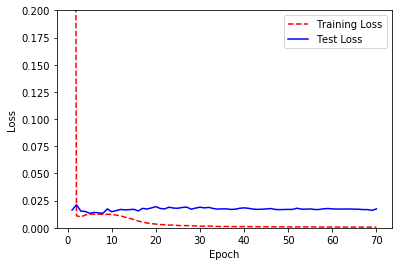

In [5]:
ml.train_curve(result['train_info'].history,name=result['name'])

In [ ]:
result['train_info'].history

In [6]:
np.save("models/{}_history".format(result['name']), result['train_info'].history)
np.save("models/{}_time".format(result['name']), result['time_info'])